### PROBLEM 1 - Roots of the polinomial

In [20]:
import numpy as np
from pylab import *
from math import *
from gaussxw import *
import gaussxw as gxw

In [2]:
def polinomio(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

def der_polinomio(x):
    return 5544*x**5 - 13860*x**4 + 12600*x**3 - 5040*x**2 + 840*x - 42

xs = np.arange(0, 1, 0.01)
ps = []

for value in xs:
    ps.append(polinomio(value))

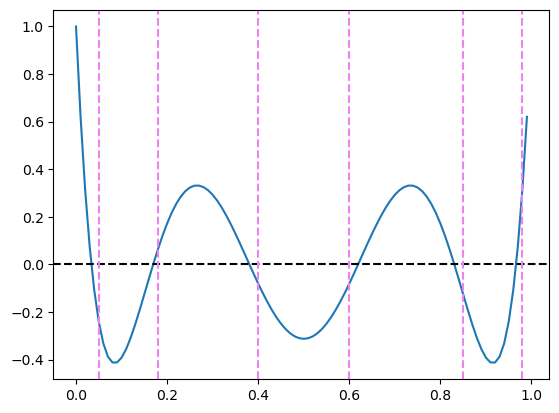

In [3]:
plt.plot(xs, ps)
plt.axhline(y=0, c='black', linestyle='--')

plt.axvline(x=0.05, c='violet', linestyle='--')
plt.axvline(x=0.18, c='violet', linestyle='--')
plt.axvline(x=0.40, c='violet', linestyle='--')
plt.axvline(x=0.60, c='violet', linestyle='--')
plt.axvline(x=0.85, c='violet', linestyle='--')
plt.axvline(x=0.98, c='violet', linestyle='--')

Alternative **a)** Just by looking at the graph we can estimate values close to the roots **0.05; 0.18; 0.40; 0.60; 0.85 and 0.98**

Alternative **b)** To calculate the real values we use the Newton's method with 10 decimal places:

In [4]:
def root(x):
    accuracy = 1e-10
    delta = 1.0

    while delta > accuracy:
        delta = polinomio(x)/der_polinomio(x)
        x -= delta
    return x

estimate = [0.05, 0.18, 0.40, 0.60, 0.85, 0.98]
all_roots = []

for value in estimate:
    all_roots.append(root(value))

In [5]:
print(f'roots: {all_roots}')

roots: [0.03337764323847266, 0.16939497925675384, 0.3806902324811746, 0.619917734535667, 0.8306046932331075, 0.9662347571015679]


### PROBLEM 2 - The Lagrange's point

Alternative **a)** Demonstration of the equation - The sum of the gravitational force of the Earth and moon provides a resulting centripetal force on the satellite:

$$ \frac{GMm'}{r^{2}} - \frac{Gmm'}{(R-r)^{2}} = \frac{m'v^{2}}{r}$$

using $\ \ v^{2} = w^{2}r^{2}\ \ $ and canceling  the equal terms we have

$$\therefore\ \boxed{\frac{GM}{r^{2}} - \frac{Gm}{(R-r)^{2}} = w^{2}r} \tag{1}$$

Alternative **b)** Rearranging the terms of the equation **(1)** we can obtain the **quintic equation**:

$$ GM(R-r)^{2}-Gmr^{2} = w^{2}r^{3}(R-r)^{2} $$

$$ -w^{2}r^{5} + 2w^{2}Rr^{4} - R^{2}w^{2}r^{3} + (M-m)Gr^{2} - 2GMRr + GMR^{2} = 0$$

Parameter assignment and equation

In [6]:
G, M, m = 6.674e-11, 5.974e24, 7.348e22
R, w = 3.844e8, 2.662e-6

def quintic(G, M, m, R, w, r):
    return -(w**2)*(r**5) + 2*(w**2)*R*(r**4) - (R**2)*(w**2)*(r**3) + (M-m)*G*(r**2) - 2*G*M*R*r + G*M*(R**2)

def der_quintic(G, M, m, R, w, r):
    return -5*(w**2)*(r**4) + 8*(w**2)*R*(r**3) - 3*(R**2)*(w**2)*(r**2) + 2*(M-m)*G*r - 2*G*M*R

Using the Newton's method, taking the distance (2/3)R as a guess:

In [7]:
L_guess = (2/3)*R

accuracy = 1e-4
delta = 1.0

while delta > accuracy:
    delta = quintic(G, M, m, R, w, L_guess)/der_quintic(G, M, m, R, w, L_guess)
    L_guess -= delta

In [8]:
print(f'L1 = {L_guess/1e8} +e8 m')

L1 = 3.002235617571727 +e8 m


To plot the graph we will construct a list of all distances and calculate the value of quintic equation for all of them

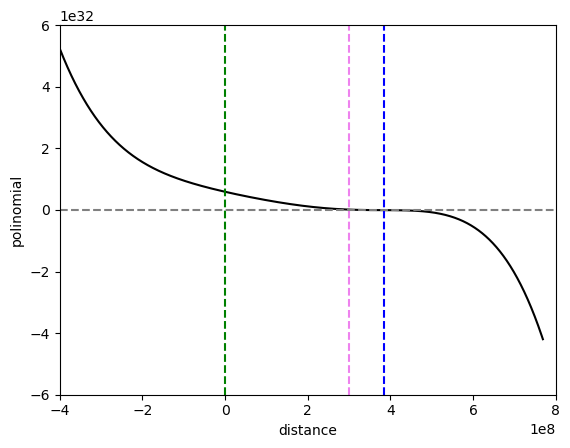

In [9]:
rs = np.arange(-2*R, 2*R, 100)
ls = []

for value in rs:
    ls.append(quintic(G, M, m, R, w, value))

plt.plot(rs, ls, c='k', linestyle='-')
plt.axvline(x = L_guess, c='violet', linestyle='--')
plt.axvline(x = 0, c='green', linestyle='--')
plt.axvline(x = R, c='blue', linestyle='--')

plt.axhline(y = 0, c='gray', linestyle='--')

plt.xlim(-4e8, 8e8)
plt.ylim(-0.6e33, 0.6e33)
plt.xlabel('distance')
plt.ylabel('polinomial')

plt.show()

The **green line is the Earth's position** at x = 0, the **blue line indicate the moon** and the **pink line the $L_{1}$ point**

We can see that if we use (2/3)R ~ $2.5*10^{8}m$ as a guess the code give to us $L_{1}$ ~ $3.0 * 10^{8}m$ as the true distance

In the image we can note that quitic equation have a root in pink line, collaborating with our result

### PROBLEM 3 - The temperature of a light bulb

Alternative **a)** We will use the Gaussian quadracture to solve the integral, as suggested:

The gauss function is in a external arquive called by **gaussxw.py** that we import at begin

In [83]:
def frac(x):
    return (x**3)/(e**x - 1)

const = 15/np.pi**4
h = 6.626e-34
c = 3e+8
kb = 1.38e-23
lambda1, lambda2 = 390e-9, 750e-9

def eta(T):
    N = 100
    a = h*c/(lambda2*kb*T)
    b = h*c/(lambda1*kb*T)

    y, w = gxw.gaussxw(N)
    
    x = ((b-a)/2)*y + (b+a)/2
    wl = ((b-a)/2)*w
    sum = 0
    
    for k in range(N):
        sum += wl[k]*frac(x[k])
    return const*sum

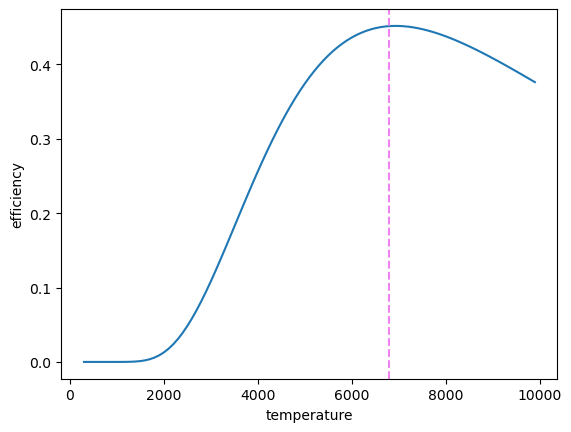

In [103]:
temps = np.arange(300, 10000, 100)
etas = []

for temperature in temps:
    etas.append(eta(temperature))

plt.plot(temps, etas)
plt.axvline(x = 6800, c='violet', linestyle='--')
plt.xlabel('temperature')
plt.ylabel('efficiency')

plt.show()

We can see the maximum value to efficiency **close to 6800K of temperature**

Alternative **b)** To estimate the maximum value for eta, we will use the Golden ratio technique, **so we guess two values x1 and x2 to extremes**

$$ z = \frac{x4 - x1}{x3 - x1} \hspace{1cm} \rightarrow \hspace{1cm} x3 = \frac{x4 - x1}{z} + x1$$

or $$ z = \frac{x3 - x1}{x2 - x1} \hspace{1cm} \rightarrow \hspace{1cm} x2 = \frac{x3 - x1}{z} + x1 $$

In [104]:
def golden_ratio(x1, x_change, z):
    return (x_change - x1)/z + x1
 
accuracy = 1e-6
z = 1/2 + np.sqrt(5)/2

x1, x4 = 4500, 9000
x3 = (x4 - x1)/z + x1

x2 = golden_ratio(x1, x3, z)

while (x4 - x1) > accuracy:
    if f2 > f3:
        x4, x3 = x3, x2
        x2 = golden_ratio(x1, x3, z)
        f1,f2, f3, f4 = eta(x1), eta(x2), eta(x3), eta(x4)
    else:
        x1, x2 = x2, x3
        x3 = golden_ratio(x1, x4, z)
        f1,f2, f3, f4 = eta(x1), eta(x2), eta(x3), eta(x4)
        
result = (x2 + x3)/2

In [105]:
print(f'temperature of maximum ~ {result} and the max "n" ~ {eta(result)}')

temperature of maximum ~ 6936.560795662697 and the max "n" ~ 0.45169384029450627


We note that temperature of **6936K is close to 6800K** that we suppose before make the calculations, **i mean, is a nice result**

Alternative **c)** I believe is not, because the **fusion temperature to tungsten is ~ 3200K**